# CS 449 Final Project Proposal

Due: February 1, 2023 at 11:59pm

## 1. Names and Net IDs

Erick Mungai - mmm1176

Rodney Reichert - rdr3218

Perry Benyella - pbe2757

## 2. Abstract

Our final project seeks to use a variety of architectures to detect the presence of metastatic tissue from histopathological scans of lymph node sections. We will use both a CNN and a Residual Network(ResNet) to generate feature vectors for the images and then vary the output network between an RNN, LSTM network and a fully connected feedforward neural network. We will then compare the performance of these networks to see which performs best. The tentative combination of networks will be CNN + RNN, CNN + LSTM, CNN + feedforward neural network, ResNet + RNN, ResNet + LSTM, ResNet + feedforward neural network.


## 3. Introduction

Detecting diseases in lymph nodes is crucial for effective medical diagnosis and treatment. Accurate identification of pathological changes in the lymph nodes can lead to earlier detection of diseases such as cancer leading to improved patient outcomes. This project aims to use machine learning techniques by applying different models to lymph node X-ray images to accurately detect diseases, and measure which of the model architecture we employ yields the best results. By utilizing a large dataset of high-resolution images, we can train our model to identify and classify various pathological changes in the lymph nodes.

## 4a. Describe your dataset(s)

We will use the PatchCamelyon (PCam) dataset, which contains a total of 327,680 color images (96 x 96px) extracted from histopathologic scans of lymph node sections. PCam is derived from the Camelyon16 Challenge, which contains 400 H&E stained WSIs of sentinel lymph node sections. The slides were acquired and digitized at 2 different centers. PCam marries the clinically-relevant task of metastasis detection into a straight-forward binary image classification task, much like MNIST. The feature structure for this dataset can be expressed through the following dictionary:

    FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(96, 96, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    })



Each datapoint has a unique id, a matrix of uint8 values representing the RGB values for each of the 96^2 pixels of the image as well as a binary label. 

The official website for the PatchCamelyon benchmark gives the following two references with regards to the dataset:

    1. B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation
       Equivariant CNNs for Digital Pathology". arXiv:1806.03962
    2. Ehteshami Bejnordi et al. Diagnostic Assessment of Deep Learning       
       Algorithms for Detection of Lymph Node Metastases in Women With Breast   
       Cancer. JAMA: The Journal of the American Medical Association, 318(22), 
       2199–2210. doi:jama.2017.14585




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


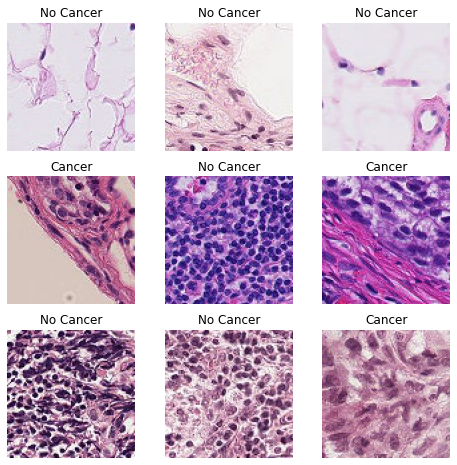

In [18]:
## 4b. Show some data
"""
    *Demonstrate that you have made at least some progress with getting your
     dataset ready to use. Load at least a few examples and visualize them
     as best you can. For example:*
"""

%pip install h5py

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## Need to manualy download and upload data, runs out of ram
## Dowload data from: https://github.com/basveeling/pcam

# training_data = datasets.PCAM(
#     root="data",
#     split='train',
#     download=True,
#     transform=ToTensor()
# )

test_data = datasets.PCAM(
    root="data",
    split="test",
    download=True,
    transform=ToTensor()
)

labels = {
    1: "Cancer",
    0: "No Cancer"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    img = img.permute(1, 2, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

## 5. Methods

This is a binary image classification task. We will use two architectures, a CNN and a ResNet to generate feature vectors for the images. CNN are a type of neural network that is widely used for image analysis. It was popularized by AlexNet which won the 2012 ImageNet competition. Residual Networks were envisioned by Kaiming He from Microsoft Research in 2015. They use skip connections in their residual block which help in solving the vanishing gradient problem in deep CNNs. 
Since this is a standard binary classification task, we will use Binary Cross Entropy as our loss function. BCE performs best for these kinds of problems. We will use an appropriate train-validation-test split which will enable us to gauge the model’s ability to generalize to new data.


## 6. Deliverables

*Include at least six goals that you think you should be able to achieve over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due February 24. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### 6.1 Essential Goals
- We will design a CNN and use it to generate feature vectors for the x-ray scans.
- We will then vary the output network between an RNN, LSTM and a fully connected feedforward neural network and benchmark the performances of all of them.


### 6.2 Desired Goals
- Since a ResNet solves the vanishing gradient problem in deep CNNs, we will switch out the CNN for a ResNet(either design our own or use a pre-trained one) to generate the feature vectors.
-We will then vary the output network the same way we did with the CNN and benchmark the performance.


### 6.3 Stretch Goals
- We will conduct a hyperparameter search for the best performing architecture combinations and see how changes in these parameters affect the performance, with the intention of improving performance even more.
-We will test our best performing architecture on a multi-class classification task to see whether it yields the same results.


## 7. Hopes and Concerns

One of the most exciting aspects of this project is the potential to contribute to the field of medical image analysis and improve disease detection in the lymph nodes. The use of advanced deep learning models such as RNNs, LSTMs, and ResNets, combined with binary classification and BCE loss, has the potential to deliver highly accurate results and make a real-world impact.

One potential challenge in this project is the complexity. Working with multiple neural network architectures can lead to increased complexity in several ways. One of the main challenges is understanding the unique characteristics and limitations of each architecture and determining the best architecture for a particular problem. Additionally, each architecture may have different hyperparameters that need to be optimized for optimal performance, adding another layer of complexity to the process. Furthermore, evaluating and comparing the performance of multiple models can also be complex, as each architecture may have different strengths and weaknesses and may perform differently on different types of data. This requires a comprehensive understanding of each architecture and the ability to accurately assess their performance and compare results.


## 8. References
A. Krizhevsky, I. Sutskever, and G. E. Hinton, “ImageNet classification with deep convolutional Neural Networks,” Advances in Neural Information Processing Systems, 01-Jan-1970. [Online]. Available: https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf. 


K. He, X. Zhang, S. Ren, and J. Sun, “Deep Residual Learning for Image Recognition,” arXiv.org, Dec. 10, 2015.[Online]. Available:  https://arxiv.org/abs/1512.03385.